In [1]:
import numpy as np
import matplotlib.pyplot as plt
from nnfs.datasets import vertical_data,spiral_data

In [2]:
#local modules
from dense import Dense
from loss import Categorical_loss_entropy
from activation import  Relu,Softmax

# Optimization

# manual adjucement of parameters

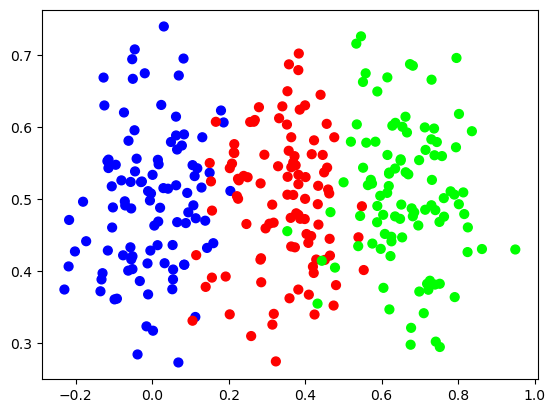

In [3]:
x,y=vertical_data(samples=100,classes=3)
plt.scatter(x[:,0],x[:,1],c=y,s=40,cmap='brg')
plt.show()

In [4]:
# lets make a good architecture of a model
dense1=Dense(2,3)

act1=Relu()

dense2=Dense(3,3)

act2=Softmax()

loss_fn=Categorical_loss_entropy()

In [5]:
#best loss
best_loss=100

# lets initialize parameters for training our models
for iteration in range(10000):
    #initialize the parameters
    dense1.weights=0.05*np.random.randn(2,3)
    dense1.bias=0.05*np.random.randn(1,3)
    dense2.weights=0.05*np.random.randn(3,3)
    dense2.bias=0.05*np.random.randn(1,3)

    #the feed forward part of the model
    dense1.forward(x)
    act1.forward(dense1.outputs)
    dense2.forward(act1.output)
    act2.forward(dense2.outputs)

    #check the loss
    loss=loss_fn.calculate(act2.outputs,y)  

    #check the accuracy
    predictions=np.argmax(act2.outputs,axis=1)
    accuracy=np.mean(predictions==y)
    
    if loss<best_loss:
        best_dense1_weight=dense1.weights.copy()
        best_dense1_bias=dense1.bias.copy()
        
        best_dense2_weight=dense2.weights.copy()
        best_dense2_bias=dense2.bias.copy()
        best_loss=loss

        print(f"new set of weight fount at,iteration: {iteration} ,with loss:{loss:.2f} and accuracy: {accuracy:.2f}")


new set of weight fount at,iteration: 0 ,with loss:1.10 and accuracy: 0.33
new set of weight fount at,iteration: 1 ,with loss:1.10 and accuracy: 0.33
new set of weight fount at,iteration: 10 ,with loss:1.10 and accuracy: 0.33
new set of weight fount at,iteration: 55 ,with loss:1.10 and accuracy: 0.33
new set of weight fount at,iteration: 75 ,with loss:1.10 and accuracy: 0.33
new set of weight fount at,iteration: 116 ,with loss:1.10 and accuracy: 0.33
new set of weight fount at,iteration: 124 ,with loss:1.10 and accuracy: 0.33
new set of weight fount at,iteration: 1101 ,with loss:1.10 and accuracy: 0.33
new set of weight fount at,iteration: 1230 ,with loss:1.10 and accuracy: 0.67


# lets see smarter way of seeing/doing things

In [6]:
#lets import some datasets
x,y=vertical_data(samples=1000,classes=3)

dense1=Dense(2,3)
act1=Relu()
dense2=Dense(3,3)
act2=Softmax()
loss_fn=Categorical_loss_entropy()

#decaler the best parameters to the inital paramertes
best_dense1_weight=dense1.weights.copy()
best_dense2_bias=dense1.bias.copy()

best_dense2_weight=dense2.weights.copy()
best_dense2_bias=dense2.bias.copy()

best_loss=1000

for iteration in range(10000):
    #lets set the values for the hyper parameters.
    dense1.weights+=0.05*np.random.randn(2,3)
    dense1.bias+=0.05*np.random.randn(1,3)
    dense2.weights+=0.05*np.random.randn(3,3)
    dense2.bias+=0.05*np.random.randn(1,3)
    
    #forward pass
    dense1.forward(x)
    act1.forward(dense1.outputs)
    dense2.forward(act1.output)
    act2.forward(dense2.outputs)
    
    #lets check for the categorical entropy loss
    loss=loss_fn.calculate(act2.outputs,y)

    #lets evalueate the accuracy
    prediction=np.argmax(act2.outputs,axis=1)   #extracting the max indexes from the predicted value
    accuracy=np.mean(prediction==y)

    if loss<best_loss:
        best_dense1_weight=dense1.weights.copy()
        best_dense1_bias=dense1.bias.copy()
        best_dense2_weight=dense2.weights.copy()
        best_dense2_bias=dense2.bias.copy()
        if iteration%1000==0:
            print(f"best founf at {iteration},with accuracy:{accuracy:.2f} and loss : {loss:.2f} ")
    else:
        dense1.weights=best_dense1_weight.copy()
        dense1.bias=best_dense_bias.copy()
        dense2.weights=best_dense2_weight.copy()
        dense2.bias=best_dense2_bias.copy()

    

best founf at 0,with accuracy:0.33 and loss : 1.10 
best founf at 1000,with accuracy:0.33 and loss : 1.17 
best founf at 2000,with accuracy:0.33 and loss : 2.15 
best founf at 3000,with accuracy:0.33 and loss : 2.32 
best founf at 4000,with accuracy:0.30 and loss : 2.39 
best founf at 5000,with accuracy:0.34 and loss : 9.55 
best founf at 6000,with accuracy:0.33 and loss : 10.74 
best founf at 7000,with accuracy:0.33 and loss : 10.73 
best founf at 8000,with accuracy:0.34 and loss : 10.64 
best founf at 9000,with accuracy:0.33 and loss : 10.74 


# lets train our model on spiral dataset

In [7]:
#lets import some datasets
x,y=spiral_data(samples=1000,classes=3)

dense1=Dense(2,3)
act1=Relu()
dense2=Dense(3,3)
act2=Softmax()
loss_fn=Categorical_loss_entropy()

#decaler the best parameters to the inital paramertes
best_dense1_weight=dense1.weights.copy()
best_dense2_bias=dense1.bias.copy()

best_dense2_weight=dense2.weights.copy()
best_dense2_bias=dense2.bias.copy()

best_loss=1000

for iteration in range(10000):
    #lets set the values for the hyper parameters.
    dense1.weights+=0.05*np.random.randn(2,3)
    dense1.bias+=0.05*np.random.randn(1,3)
    dense2.weights+=0.05*np.random.randn(3,3)
    dense2.bias+=0.05*np.random.randn(1,3)
    
    #forward pass
    dense1.forward(x)
    act1.forward(dense1.outputs)
    dense2.forward(act1.output)
    act2.forward(dense2.outputs)
    
    #lets check for the categorical entropy loss
    loss=loss_fn.calculate(act2.outputs,y)

    #lets evalueate the accuracy
    prediction=np.argmax(act2.outputs,axis=1)   #extracting the max indexes from the predicted value
    accuracy=np.mean(prediction==y)

    if loss<best_loss:
        best_dense1_weight=dense1.weights.copy()
        best_dense1_bias=dense1.bias.copy()
        best_dense2_weight=dense2.weights.copy()
        best_dense2_bias=dense2.bias.copy()
        if iteration%1000==0:
            print(f"best founf at {iteration},with accuracy:{accuracy:.2f} and loss : {loss:.2f} ")
    else:
        dense1.weights=best_dense1_weight.copy()
        dense1.bias=best_dense_bias.copy()
        dense2.weights=best_dense2_weight.copy()
        dense2.bias=best_dense2_bias.copy()

    

best founf at 0,with accuracy:0.33 and loss : 1.10 
best founf at 1000,with accuracy:0.36 and loss : 2.68 
best founf at 2000,with accuracy:0.29 and loss : 2.64 
best founf at 3000,with accuracy:0.33 and loss : 2.91 
best founf at 4000,with accuracy:0.29 and loss : 4.71 
best founf at 5000,with accuracy:0.33 and loss : 8.16 
best founf at 6000,with accuracy:0.33 and loss : 7.37 
best founf at 7000,with accuracy:0.36 and loss : 6.21 
best founf at 8000,with accuracy:0.39 and loss : 6.03 
best founf at 9000,with accuracy:0.33 and loss : 10.06 
